<a href="https://colab.research.google.com/github/Naresh-812/deepfake32_on_KV260/blob/main/deepfake32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nareshlankalapalli_deepfake_path = kagglehub.dataset_download('nareshlankalapalli/deepfake')

print('Data source import complete.')


In [ ]:
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import cv2
import kagglehub

2025-08-23 07:01:26.548892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755932486.711752      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755932486.764169      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
path = kagglehub.dataset_download("nareshlankalapalli/deepfake")

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image settings
img_size=32   # or your preferred size
batch_size = 8
train_dir = '/kaggle/input/deepfake/faceforniscs/train'
test_dir = '/kaggle/input/deepfake/faceforniscs/test'
val_dir='/kaggle/input/deepfake/faceforniscs/validation'
# Create training and validation ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    )

# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    )

# Testing generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary'

)

Found 11633 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.
Found 1983 images belonging to 2 classes.


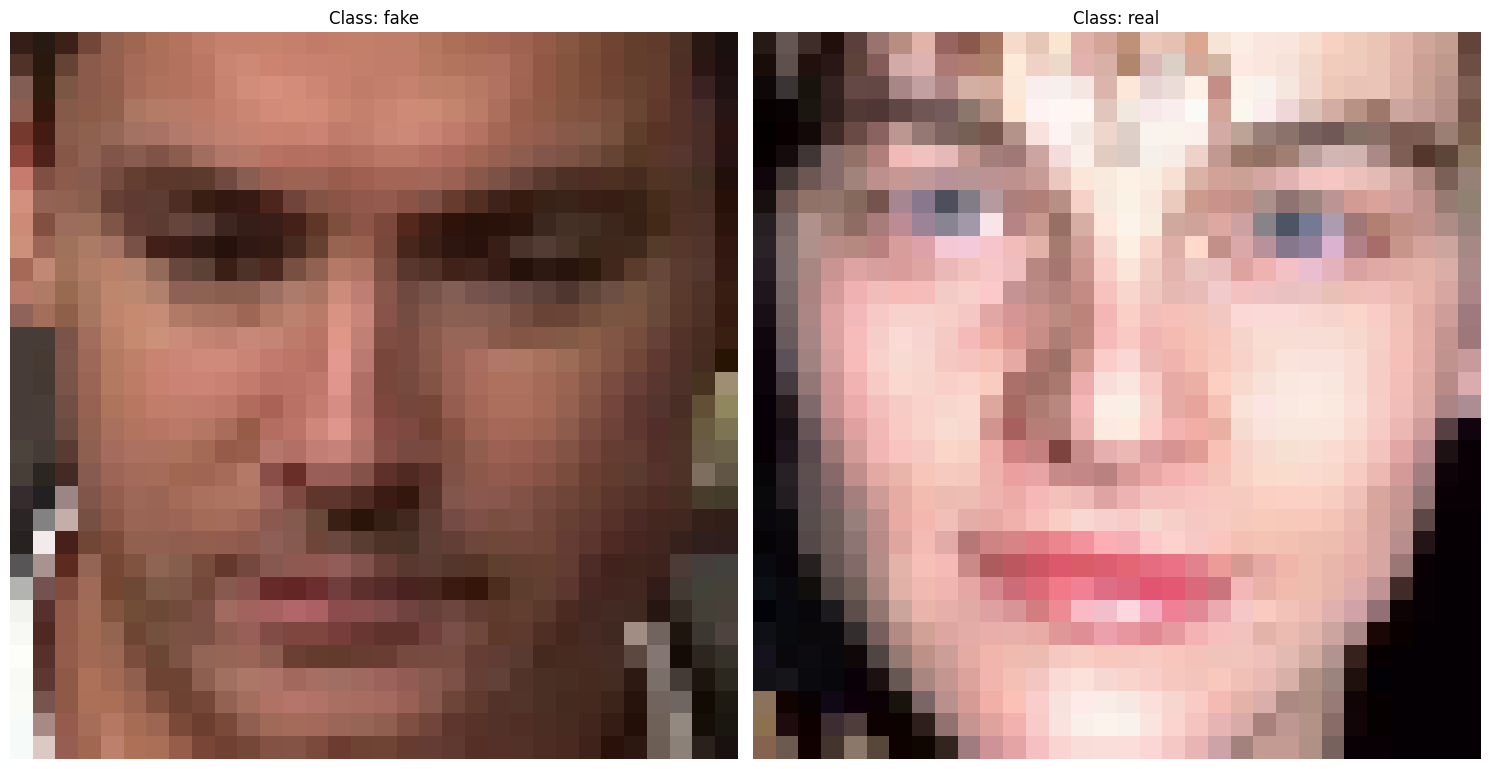

In [ ]:
import random
# Automatically get class folder names
class_names= ['fake','real']

# Plot one random image from each class folder
plt.figure(figsize=(15, 8))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    if not image_files:
        print(f"No images found in {class_name}")
        continue

    # Randomly select one image
    selected_image = random.choice(image_files)
    img_path = os.path.join(class_path, selected_image)
    img = load_img(img_path, target_size=(img_size,img_size,3))

    plt.subplot(1, 2, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


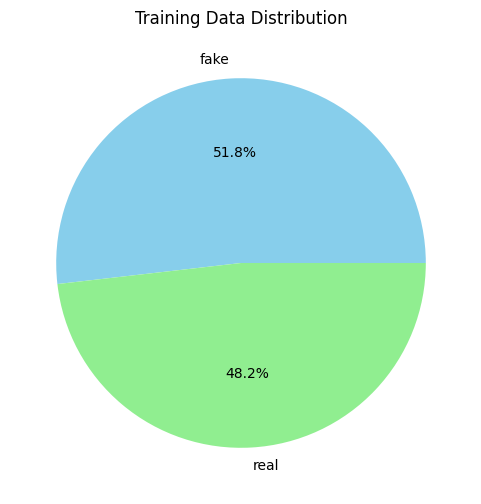

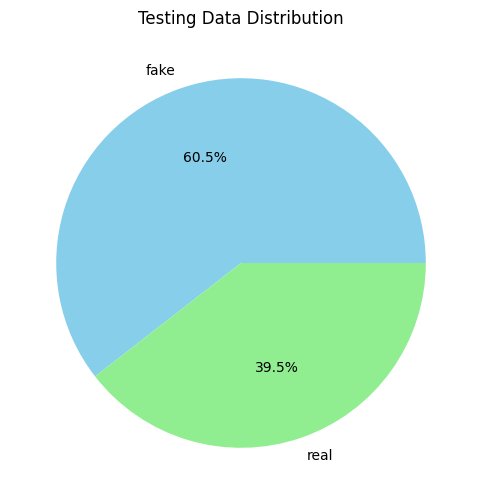

Training Data Counts:
fake: 6028 images
real: 5605 images

Testing Data Counts:
fake: 1200 images
real: 783 images


In [ ]:
# Function to count images in each class
def count_images(dataset_path):
    class_counts = {}
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            num_images = len(os.listdir(label_path))
            class_counts[label] = num_images
    return class_counts

# Count images in training and testing datasets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Plot pie charts
def plot_pie_chart(class_counts, title):
    labels = list(class_counts.keys())
    sizes = list(class_counts.values())
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.title(title)
    plt.show()

# Plot for training data
plot_pie_chart(train_counts, "Training Data Distribution")

# Plot for testing data
plot_pie_chart(test_counts, "Testing Data Distribution")

# Print the number of images in each class
print("Training Data Counts:")
for label, count in train_counts.items():
    print(f"{label}: {count} images")

print("\nTesting Data Counts:")
for label, count in test_counts.items():
    print(f"{label}: {count} images")

In [ ]:


import tensorflow as tf
from tensorflow.keras import layers, datasets, models
# cnn construction
model = models.Sequential()
# conv layer 1
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))  # output size: 28*28*32
# max pooling 1
model.add(layers.MaxPooling2D((2, 2)))  # output size: 14*14*32
# conv layer 2
model.add(layers.Conv2D(32, (5, 5), activation='relu'))  # output size: 10*10*64
# max pooling 2
model.add(layers.MaxPooling2D((2, 2)))  # output size: 5*5*32
# flat data
model.add(layers.Flatten())  # 800 neurons
# full connection 1
model.add(layers.Dense(64, activation='relu'))  #
# full connection 2, output is soft-maxed
model.add(layers.Dense(1, activation='sigmoid'))
# print information
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1755932514.591918      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,393 (310.13 KB)

 Trainable params: 79,393 (310.13 KB)

 Non-trainable params: 0 (0.00 B)

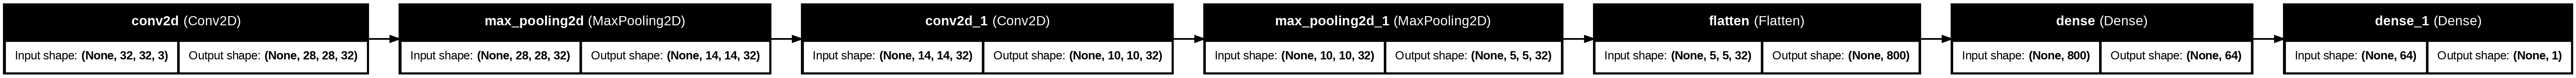

In [ ]:
# Save visual block diagram
plot_model(model, to_file='deep_fake32_cnn_model.png', show_shapes=True, show_layer_names=True, rankdir='LR')

# Display block diagram
try:
    display(Image(filename='deep_fake32_cnn_model.png'))
except:
    print("Model plot saved as 'deep_fake32_cnn_model.png'")

from tensorflow.keras.optimizers import Adam

#optimizer = Adam(learning_rate=1e-5)
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator ,
     validation_steps=val_generator .samples //val_generator .batch_size,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1755932517.881753     118 service.cc:148] XLA service 0x79b6bc00c6f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755932517.882483     118 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1755932518.146520     118 cuda_dnn.cc:529] Loaded cuDNN version 90300


   5/1454 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.4112 - loss: 0.7343

I0000 00:00:1755932519.695743     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1454/1454 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5081 - loss: 0.6913 - val_accuracy: 0.5013 - val_loss: 0.6934
Epoch 2/50
   1/1454 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6250 - loss: 0.6876

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1454/1454 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6250 - loss: 0.6876 - val_accuracy: 0.5004 - val_loss: 0.6934
Epoch 3/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5316 - loss: 0.6771 - val_accuracy: 0.5504 - val_loss: 0.6938
Epoch 4/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.8081 - val_accuracy: 0.5525 - val_loss: 0.6937
Epoch 5/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.6077 - loss: 0.6485 - val_accuracy: 0.5867 - val_loss: 0.6667
Epoch 6/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.5237 - val_accuracy: 0.5858 - val_loss: 0.6663
Epoch 7/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.6896 - loss: 0.5872 - val_accuracy: 0.6521 - val_loss: 0.6440
Epoch 8/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6250 - loss: 0.5925 - val_accuracy: 0.6579 - val_loss: 0.6425
Epoch 9/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7409 - loss: 0.5245 - val

In [ ]:
model.save("/kaggle/working/deep_fake32_leaf_disease_model.h5")

In [ ]:
# Accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Loss
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Training Accuracy:   {train_acc * 100:.2f}%")
print(f"Training Loss:       {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss:     {val_loss:.4f}")


Training Accuracy:   100.00%
Training Loss:       0.0638
Validation Accuracy: 70.92%
Validation Loss:     1.0939


In [ ]:
# This is the easiest way for binary classification
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6866 - loss: 1.2507
Test Accuracy: 70.05%


Found 11633 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


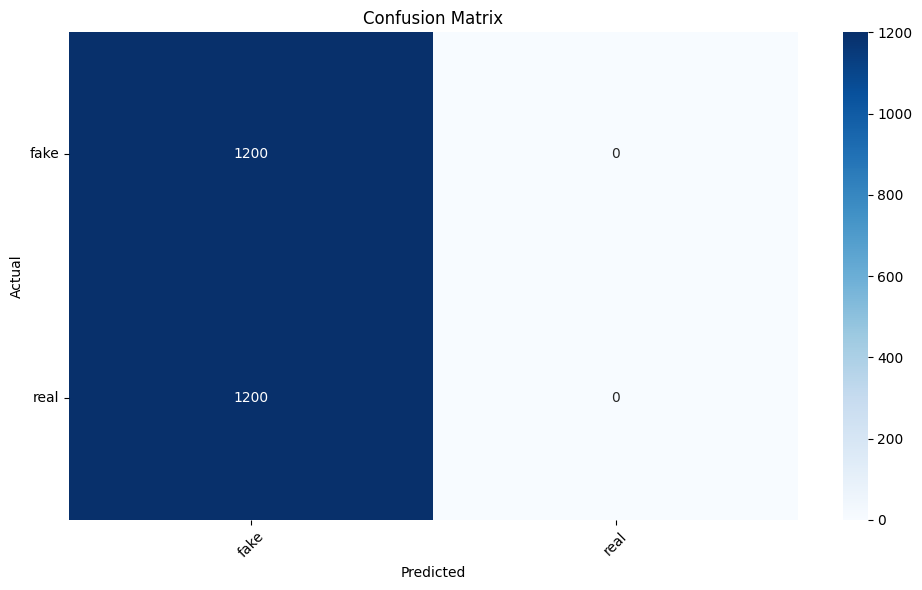


Classification Report:
              precision    recall  f1-score   support

        fake       0.50      1.00      0.67      1200
        real       0.00      0.00      0.00      1200

    accuracy                           0.50      2400
   macro avg       0.25      0.50      0.33      2400
weighted avg       0.25      0.50      0.33      2400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Ensure validation_generator is not shuffled ---
# If not already done earlier, re-define it here with shuffle=False
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary'
)
# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)

# --- Get true labels from validation set ---
Y_true = val_generator.classes

# --- Predict class probabilities using the trained model ---
# Cast the result of np.ceil to an integer for the 'steps' argument
Y_pred_probs = model.predict(val_generator, steps=int(np.ceil(val_generator.samples / val_generator.batch_size)))

# --- Get predicted class indices ---
Y_pred = np.argmax(Y_pred_probs, axis=1)

# --- Get class names ---
class_names = list(val_generator.class_indices.keys())

# --- Generate the confusion matrix ---
cm = confusion_matrix(Y_true, Y_pred)

# --- Plot the confusion matrix ---
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Print classification report ---
print("\nClassification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_names))

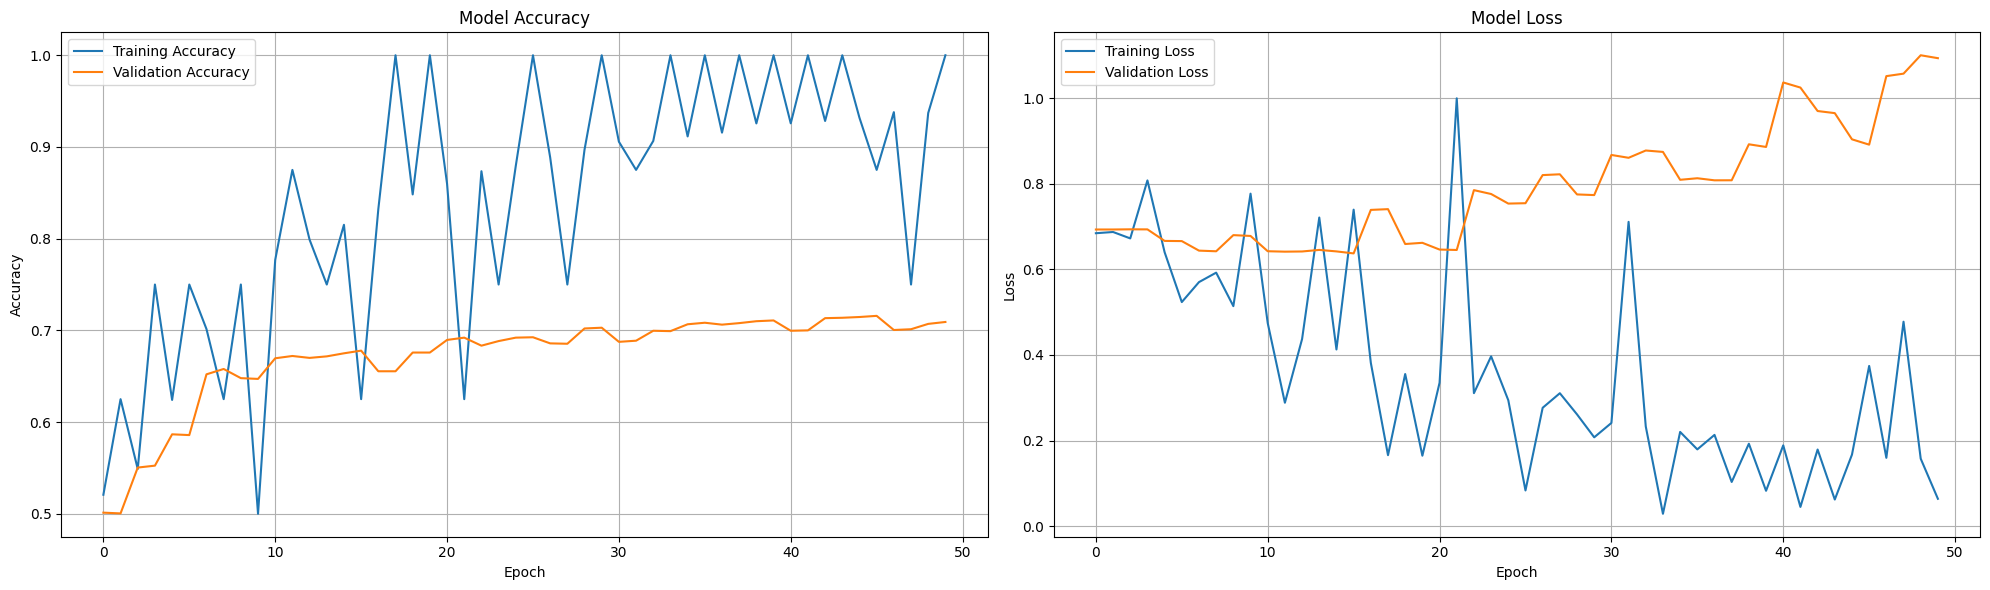

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(20,6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


